# Tokyo Olympics EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
medal = pd.read_excel("Medals.xlsx", engine='openpyxl')

C:\Users\nanal\anaconda3\envs\datascience\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
medal

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
# Weighted Mean
np.average(medal['Total'], weights=medal['Gold'])

46.832352941176474

In [5]:
# Trimmed Mean
from scipy.stats import trim_mean

trim_mean(medal['Total'], 0.1)

6.8933333333333335

In [6]:
medal['Gold'].head(10)

0    39
1    38
2    27
3    22
4    20
5    17
6    10
7    10
8    10
9    10
Name: Gold, dtype: int64

In [7]:
medal['Gold'].tail(10)

83    0
84    0
85    0
86    0
87    0
88    0
89    0
90    0
91    0
92    0
Name: Gold, dtype: int64

In [8]:
# Median
medal['Total'].median()

4.0

In [9]:
# Weighted median

def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal, "Total", 'Gold')

40

In [10]:
q3 = np.percentile(medal['Total'], 75)
q3

11.0

In [11]:
medal.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [12]:
# Variance

from statistics import variance

variance(medal['Gold'])

49.315100514259

In [13]:
# Standard Deviation

from statistics import stdev

stdev(medal["Gold"])

7.022471111671376

In [14]:
# Mean Absolute Deviation = l1 Norm = Manhattan Norm
# Mean of the absolute value of the deviation from the mean

from numpy import mean, absolute

mean(absolute(medal['Gold'] - mean(medal['Gold'])))

4.0048560527228565

In [15]:
# Median Absolute Deviation

from numpy import median

median(absolute(medal['Gold'] - median(medal['Gold'])))

1.0

In [16]:
# Interquartile Range

q3, q1 = np.percentile(medal['Gold'], [75, 25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution

<AxesSubplot:>

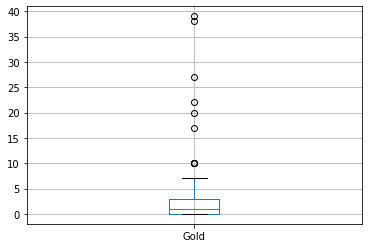

In [18]:
# Box Plots

medal.boxplot(column='Gold', by=None, ax=None)

<AxesSubplot:>

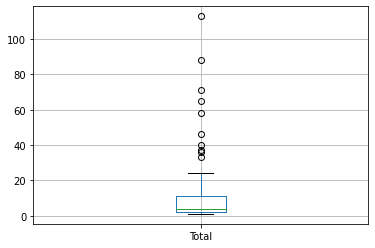

In [19]:
medal.boxplot(column='Total', by=None, ax=None)

In [26]:
# Frequency Table

frequency_table = medal.copy()
frequency_table["freq"] = pd.cut(medal['Gold'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([83.,  4.,  3.,  1.,  2.]),
 array([ 0. ,  7.8, 15.6, 23.4, 31.2, 39. ]),
 <BarContainer object of 5 artists>)

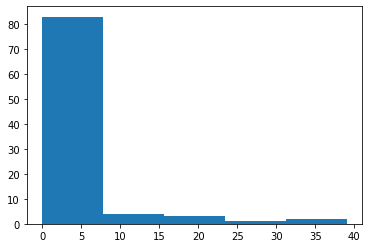

In [29]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(x=medal['Gold'], bins=5)

<AxesSubplot:ylabel='Density'>

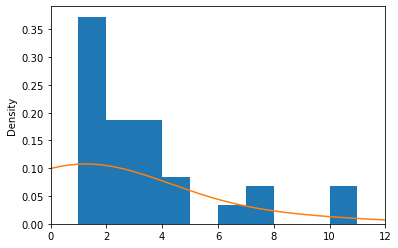

In [30]:
# Density Plot : Histogram with a line

ax = medal['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
medal['Gold'].plot.density(ax=ax)

## Exploring Binary and Categorical Data

In [31]:
# Mode

medal['Gold'].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

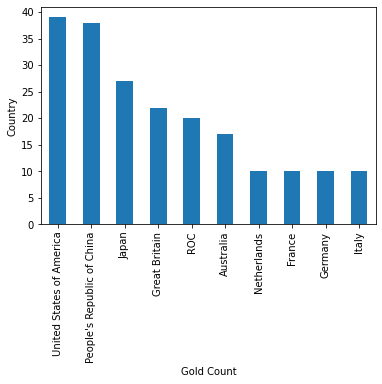

In [33]:
# Bar Plots

ax = medal.iloc[:10, :].plot.bar(x='Team/NOC', y='Gold', legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')

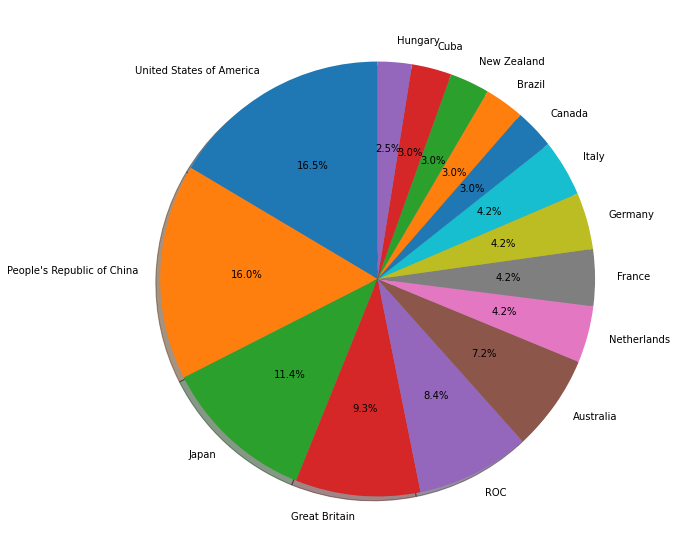

In [45]:
# Pie Chart

pie_data = medal.iloc[:15, :]

plt.figure(figsize=(10,10))
plt.pie(pie_data['Gold'], labels=pie_data['Team/NOC'], autopct = '%1.1f%%',
        shadow=True, startangle=90)
plt.show()

## Correlation

In [46]:
medal.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:>

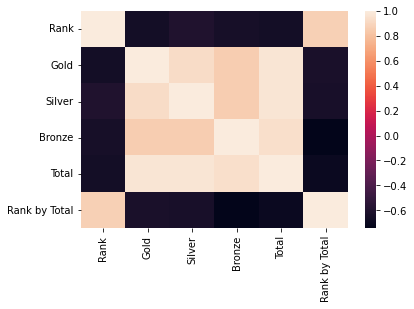

In [49]:
import seaborn as sns

sns.heatmap(medal.corr())